<a href="https://colab.research.google.com/github/VictoryChianumba/Github-Projects/blob/main/Weather_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd

In [61]:
weather = pd.read_csv("weather.csv", index_col = "DATE")

In [62]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",90.0,100.0,NaN,NaN,NaN,0.05,0.4,0.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [64]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.502175
ACSH       0.502149
AWND       0.264834
FMTM       0.475769
PGTM       0.349643
PRCP       0.000000
SNOW       0.000000
SNWD       0.000026
TAVG       0.679455
TMAX       0.000000
TMIN       0.000000
TSUN       0.997774
WDF1       0.599177
WDF2       0.497929
WDF5       0.500337
WDFG       0.659910
WDFM       0.903101
WESD       0.683882
WSF1       0.599073
WSF2       0.497929
WSF5       0.500362
WSFG       0.599151
WSFM       0.903101
WT01       0.656208
WT02       0.952211
WT03       0.931811
WT04       0.982267
WT05       0.981257
WT06       0.990525
WT07       0.994641
WT08       0.776043
WT09       0.994305
WT11       0.999146
WT13       0.893290
WT14       0.955576
WT15       0.997825
WT16       0.664104
WT17       0.996971
WT18       0.937610
WT19       0.999741
WT21       0.999819
WT22       0.997437
WV01       0.999974
WV20       0.999974
dtype: float64

In [65]:
valid_columns = weather.columns[null_pct < .05]

In [66]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [67]:
weather = weather[valid_columns].copy()

In [68]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [69]:
weather.columns = weather.columns.str.lower()

In [70]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21


In [71]:
weather.index = pd.to_datetime(weather.index)

In [72]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17'],
              dtype='datetime64[ns]', name='DATE', length=38628, freq=None)

In [73]:
weather["station"].unique()

array(['USW00014732', 'USW00094789'], dtype=object)

In [74]:
lga = weather[weather["station"] == "USW00014732"].copy()

In [75]:
lga.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21


In [76]:
weather = weather[weather["station"] == "USW00094789"].copy()

In [77]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [78]:
weather = weather.merge(lga, left_index = True, right_index = True)

In [79]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y
DATE,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36


In [80]:
weather["y"] = weather.shift(-1)["tmax_x"]

In [81]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y,y
DATE,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43,47.0
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38,46.0
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36,53.0


In [82]:
weather = weather.ffill()

In [83]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y,y
DATE,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43,47.0
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38,46.0
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36,53.0


In [84]:
weather["ds"] = weather.index

In [85]:
weather

,station_x,name_x,prcp_x,snow_x,snwd_x,tmax_x,tmin_x,station_y,name_y,prcp_y,snow_y,snwd_y,tmax_y,tmin_y,y,ds
DATE,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,31.0,1970-01-01
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,38.0,1970-01-02
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,31.0,1970-01-03
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0,1970-01-04
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,1970-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,62,43,47.0,2022-11-13
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,46,38,46.0,2022-11-14
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,USW00014732,"LAGUARDIA AIRPORT, NY US",0.49,0.0,0.0,48,36,53.0,2022-11-15


In [86]:
predictors = weather.columns[~weather.columns.isin(["y","name_x", "station_x", "name_y", "station_y", "ds"])]

In [87]:
predictors

Index(['prcp_x', 'snow_x', 'snwd_x', 'tmax_x', 'tmin_x', 'prcp_y', 'snow_y',
       'snwd_y', 'tmax_y', 'tmin_y'],
      dtype='object')

In [88]:
train = weather[:"2021-12-31"]
test = weather["2021-12-31":]

In [89]:
from prophet import Prophet

In [90]:
def fit_prophet(train):
  m = Prophet()
  for p in predictors:
    m.add_regressor(p)
  m.fit(train)
  return m

m = fit_prophet(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/p3j7a4qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/asy94fbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24334', 'data', 'file=/tmp/tmpz4dgnohc/p3j7a4qz.json', 'init=/tmp/tmpz4dgnohc/asy94fbi.json', 'output', 'file=/tmp/tmpz4dgnohc/prophet_modelbi4xyuy3/prophet_model-20230811164636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
predictions = m.predict(test)

In [92]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-31,61.451254,43.434586,58.836366,61.451254,61.451254,-10.169702,-10.169702,-10.169702,-2.403953,...,0.024416,0.024416,0.024416,-7.790165,-7.790165,-7.790165,0.0,0.0,0.0,51.281552
1,2022-01-01,61.451028,44.590554,60.151619,61.451028,61.451028,-9.471777,-9.471777,-9.471777,-1.622450,...,-0.016357,-0.016357,-0.016357,-7.832971,-7.832971,-7.832971,0.0,0.0,0.0,51.979251
2,2022-01-02,61.450802,41.543505,57.684141,61.450802,61.450802,-11.882927,-11.882927,-11.882927,-4.101574,...,0.092354,0.092354,0.092354,-7.873707,-7.873707,-7.873707,0.0,0.0,0.0,49.567875
3,2022-01-03,61.450576,30.764446,46.213350,61.450576,61.450576,-22.891677,-22.891677,-22.891677,-15.307131,...,0.327862,0.327862,0.327862,-7.912407,-7.912407,-7.912407,0.0,0.0,0.0,38.558900
4,2022-01-04,61.450351,28.857859,43.423497,61.450351,61.450351,-25.297665,-25.297665,-25.297665,-17.255724,...,-0.092849,-0.092849,-0.092849,-7.949093,-7.949093,-7.949093,0.0,0.0,0.0,36.152685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2022-11-13,61.379672,48.921648,63.980969,61.366102,61.400033,-5.039858,-5.039858,-5.039858,-2.145810,...,0.092354,0.092354,0.092354,-2.986402,-2.986402,-2.986402,0.0,0.0,0.0,56.339814
318,2022-11-14,61.379447,42.400880,57.421884,61.365789,61.399974,-11.142693,-11.142693,-11.142693,-8.346338,...,0.327862,0.327862,0.327862,-3.124217,-3.124217,-3.124217,0.0,0.0,0.0,50.236753
319,2022-11-15,61.379221,41.969821,57.018664,61.365510,61.399914,-12.077777,-12.077777,-12.077777,-8.723546,...,-0.092849,-0.092849,-0.092849,-3.261382,-3.261382,-3.261382,0.0,0.0,0.0,49.301444
320,2022-11-16,61.378995,42.786881,57.446839,61.365230,61.399855,-10.707329,-10.707329,-10.707329,-7.047323,...,-0.262192,-0.262192,-0.262192,-3.397815,-3.397815,-3.397815,0.0,0.0,0.0,50.671666


<Axes: xlabel='ds'>

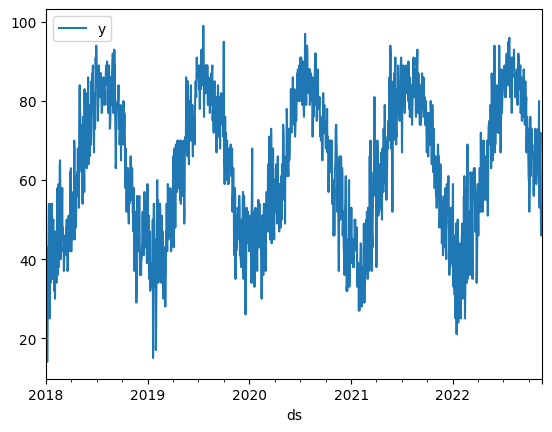

In [93]:
weather["2018-01-01":].plot("ds", "y")

In [94]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

In [95]:
plot_components_plotly(m, predictions)

In [96]:
from prophet.utilities import regressor_coefficients

In [97]:
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,prcp_x,additive,0.118130,-0.196075,-0.196075,-0.196075
1,snow_x,additive,0.064540,-0.011854,-0.011854,-0.011854
2,snwd_x,additive,0.209635,0.062660,0.062660,0.062660
3,tmax_x,additive,61.758648,0.012328,0.012328,0.012328
4,tmin_x,additive,47.494024,-0.084528,-0.084528,-0.084528
5,prcp_y,additive,0.123378,-0.320162,-0.320162,-0.320162
6,snow_y,additive,0.071347,-0.491505,-0.491505,-0.491505
7,snwd_y,additive,0.217759,-0.201085,-0.201085,-0.201085
8,tmax_y,additive,62.609277,0.281515,0.281515,0.281515
9,tmin_y,additive,48.923130,0.427888,0.427888,0.427888


In [98]:
predictions.index = test.index

In [99]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
DATE,,,,,,,,,,,,,,,,,,,,,
2021-12-31,2021-12-31,61.451254,43.434586,58.836366,61.451254,61.451254,-10.169702,-10.169702,-10.169702,-2.403953,...,0.024416,0.024416,0.024416,-7.790165,-7.790165,-7.790165,0.0,0.0,0.0,51.281552
2022-01-01,2022-01-01,61.451028,44.590554,60.151619,61.451028,61.451028,-9.471777,-9.471777,-9.471777,-1.622450,...,-0.016357,-0.016357,-0.016357,-7.832971,-7.832971,-7.832971,0.0,0.0,0.0,51.979251
2022-01-02,2022-01-02,61.450802,41.543505,57.684141,61.450802,61.450802,-11.882927,-11.882927,-11.882927,-4.101574,...,0.092354,0.092354,0.092354,-7.873707,-7.873707,-7.873707,0.0,0.0,0.0,49.567875
2022-01-03,2022-01-03,61.450576,30.764446,46.213350,61.450576,61.450576,-22.891677,-22.891677,-22.891677,-15.307131,...,0.327862,0.327862,0.327862,-7.912407,-7.912407,-7.912407,0.0,0.0,0.0,38.558900
2022-01-04,2022-01-04,61.450351,28.857859,43.423497,61.450351,61.450351,-25.297665,-25.297665,-25.297665,-17.255724,...,-0.092849,-0.092849,-0.092849,-7.949093,-7.949093,-7.949093,0.0,0.0,0.0,36.152685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,2022-11-13,61.379672,48.921648,63.980969,61.366102,61.400033,-5.039858,-5.039858,-5.039858,-2.145810,...,0.092354,0.092354,0.092354,-2.986402,-2.986402,-2.986402,0.0,0.0,0.0,56.339814
2022-11-14,2022-11-14,61.379447,42.400880,57.421884,61.365789,61.399974,-11.142693,-11.142693,-11.142693,-8.346338,...,0.327862,0.327862,0.327862,-3.124217,-3.124217,-3.124217,0.0,0.0,0.0,50.236753
2022-11-15,2022-11-15,61.379221,41.969821,57.018664,61.365510,61.399914,-12.077777,-12.077777,-12.077777,-8.723546,...,-0.092849,-0.092849,-0.092849,-3.261382,-3.261382,-3.261382,0.0,0.0,0.0,49.301444


In [100]:
predictions["actual"] = test["y"]

In [101]:
def mse(predictions, actual_label= "actual", pred_label= "yhat"):
  se = ((predictions[actual_label] - predictions[pred_label])**2)
  print(se.mean())

mse(predictions)

40.53787371020588


In [102]:
from prophet.diagnostics import cross_validation

In [105]:

m = fit_prophet(weather)
cv = cross_validation(m, initial = f'{365 * 5} days', period = '180 days', horizon = '180 days', parallel = "processes")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/rsv_b1j4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/yzhrzvpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35017', 'data', 'file=/tmp/tmpz4dgnohc/rsv_b1j4.json', 'init=/tmp/tmpz4dgnohc/yzhrzvpu.json', 'output', 'file=/tmp/tmpz4dgnohc/prophet_models6z9_b9m/prophet_model-20230811164928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 97 forecasts with cutoffs between 1975-01-28 00:00:00 and 2022-05-21 00:00:00
INFO:prophet:Applying in parallel with <conc

In [107]:
mse(cv, actual_label = "y")

36.17937315249508


<Axes: >

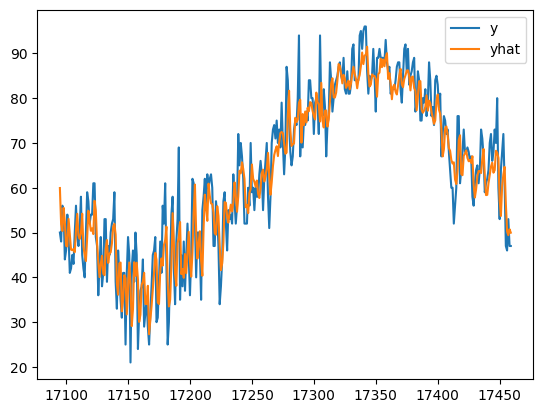

In [108]:
cv[["y", "yhat"]][-365:].plot()

In [109]:
m = fit_prophet(weather)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/9pi1inoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/hp2lcgfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59100', 'data', 'file=/tmp/tmpz4dgnohc/9pi1inoy.json', 'init=/tmp/tmpz4dgnohc/hp2lcgfh.json', 'output', 'file=/tmp/tmpz4dgnohc/prophet_model_n6gzxlc/prophet_model-20230811173346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [110]:
m.predict(weather.iloc[-1:])

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-17,61.669695,42.758839,58.274899,61.669695,61.669695,-11.5313,-11.5313,-11.5313,-7.905549,...,-0.065197,-0.065197,-0.065197,-3.560554,-3.560554,-3.560554,0.0,0.0,0.0,50.138395


In [112]:
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/szwc3au2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4dgnohc/njuhbsmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69947', 'data', 'file=/tmp/tmpz4dgnohc/szwc3au2.json', 'init=/tmp/tmpz4dgnohc/njuhbsmp.json', 'output', 'file=/tmp/tmpz4dgnohc/prophet_modelh6yguarl/prophet_model-20230811181434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
future

,ds
0,1970-01-01
1,1970-01-02
2,1970-01-03
3,1970-01-04
4,1970-01-05
...,...
19674,2023-11-13
19675,2023-11-14
19676,2023-11-15
19677,2023-11-16


In [117]:
forecast = m.predict(future)

In [118]:
plot_plotly(m, forecast)